In [1]:
from preprocess import *
from main import *

In [2]:
np.random.seed(1337)

M = 300
k = 10
N = np.random.randint(150,200,size=M)
V = 30

# Create 3 groups of documents, each with a topic preference
alpha_gen1 = np.array((20,15,10,1,1,1,1,1,1,1))
alpha_gen2 = np.array((1,1,1,10,15,20,1,1,1,1))
alpha_gen3 = np.array((1,1,1,1,1,1,10,12,15,18))

# Arbitrarily choose each topic to have 3 very common words
beta_probs = np.ones((V,k)) + np.array([np.arange(V)%k==i for i in range(k)]).T*19
beta_gen = np.array(list(map(lambda x: np.random.dirichlet(x),beta_probs.T))).T

w_struct = list();
theta = np.empty((M,k))

# Generate each document
for m in range(M):
    # Draw topic distribution for the document
    if m<M/3:
        theta[m,:] = np.random.dirichlet(alpha_gen1,1)[0]
    elif m<2*M/3:
        theta[m,:] = np.random.dirichlet(alpha_gen2,1)[0]
    else:
        theta[m,:] = np.random.dirichlet(alpha_gen3,1)[0]
    doc = np.array([])

    for n in range(N[m]):
        # Draw topic according to document's topic distribution
        z_n = np.random.choice(np.arange(k),p=theta[m,:])
        # Draw word according to topic
        w_n = np.random.choice(np.arange(V),p=beta_gen[:,z_n])
        doc = np.append(doc,w_n)
    w_struct.append(doc)

In [3]:
corpus = w_struct
corpus_processed = []
for doc_processed in corpus:
    doc_matrix = np.zeros((len(doc_processed), V))
    for (id, word) in enumerate(doc_processed):
        doc_matrix[id, int(word)] = 1
    doc_matrix = doc_matrix.astype(int)
    corpus_processed.append(doc_matrix)

In [4]:
alpha, beta = LDA.parameter_estimation(corpus_processed, 10, max_iter=100)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

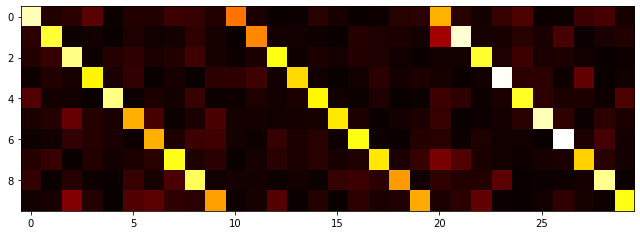

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9, 4))
plt.imshow(beta_gen.T, cmap='hot', interpolation='nearest')
plt.tight_layout()
plt.savefig('true_beta.pdf')
plt.show()

0


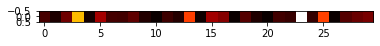

1


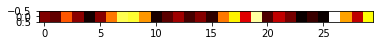

2


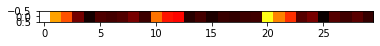

3


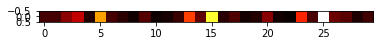

4


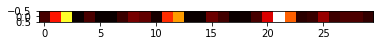

5


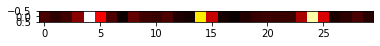

6


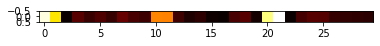

7


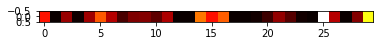

8


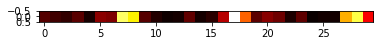

9


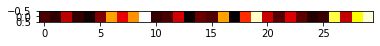

In [10]:
for i in range(10):
    print(i)
    plt.imshow(beta[i][:, np.newaxis].T, cmap='hot', interpolation='nearest')
    plt.show()

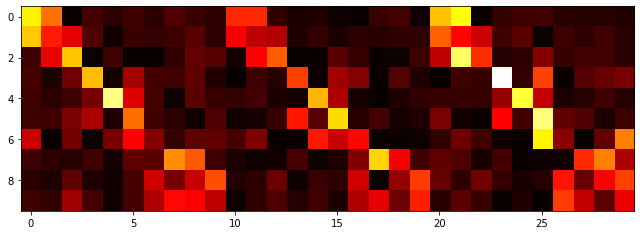

In [58]:
m = []
m.append(beta[6])
m.append(beta[2])
m.append(beta[4])
m.append(beta[0])
m.append(beta[5])
m.append(beta[3])
m.append(beta[7])
m.append(beta[8])
m.append(beta[9])
m.append(beta[1])
m = np.array(m)
fig = plt.figure(figsize=(9, 4))
plt.imshow(m, cmap='hot', interpolation='nearest')
plt.tight_layout()
plt.savefig('est_beta.pdf')
plt.show()